In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score


In [4]:
df=pd.read_csv(r"/content/Cause of Death_Training Part.csv")
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Target
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
df.describe()

,X1,X3,X4,X5,X9,X10,Target
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3824.000000,3999.000000
mean,36240.242811,43.863066,0.104276,0.058515,106.819045,28.963494,0.062266
std,21243.804561,22.668038,0.305657,0.234743,45.705359,7.849446,0.241667
min,77.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,17293.000000,26.000000,0.000000,0.000000,77.550000,23.600000,0.000000
50%,36488.000000,46.000000,0.000000,0.000000,92.260000,28.100000,0.000000
75%,54605.000000,62.000000,0.000000,0.000000,114.515000,33.100000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3999 non-null   int64  
 1   X2      3999 non-null   object 
 2   X3      3999 non-null   float64
 3   X4      3999 non-null   int64  
 4   X5      3999 non-null   int64  
 5   X6      3999 non-null   object 
 6   X7      3999 non-null   object 
 7   X8      3999 non-null   object 
 8   X9      3999 non-null   float64
 9   X10     3824 non-null   float64
 10  X11     3999 non-null   object 
 11  Target  3999 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 375.0+ KB


In [7]:
for i in df.columns:
    print(f"{i} unique is {df[i].unique()}")


X1 unique is [ 9046 51676 31112 ... 24201 18032 62396]
X2 unique is ['Male' 'Female' 'Other']
X3 unique is [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-0

In [8]:
df.isnull().sum()

X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10       175
X11         0
Target      0
dtype: int64

<Axes: >

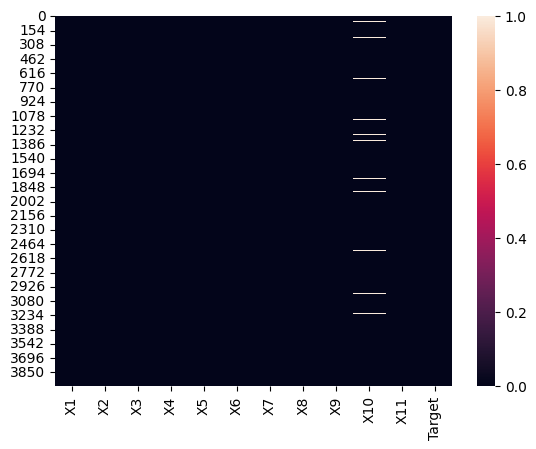

In [9]:
sns.heatmap(df.isna())

In [10]:
df["X10"].fillna(df["X10"].mean(), inplace=True)

In [11]:
df.isnull().sum()

X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
Target    0
dtype: int64

<Axes: >

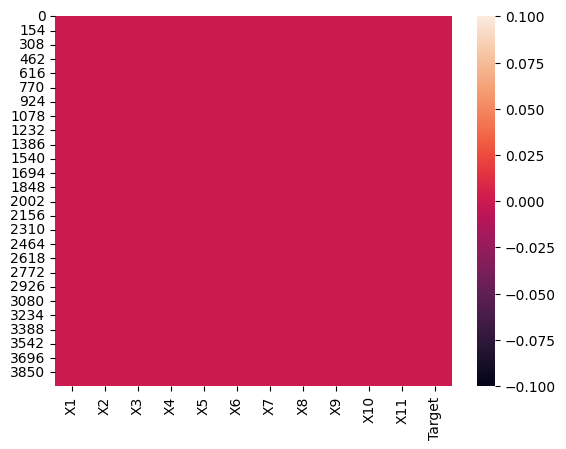

In [12]:
sns.heatmap(df.isna())

In [13]:
df.duplicated().sum()

0

In [14]:
object_cols=['X2', 'X6', 'X7', 'X8', 'X11']

In [15]:
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [16]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Target
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.963494,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [17]:
correlation_matrix = df.corr()
correlation_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Target
X1,1.000000,0.022936,-0.011666,-0.006298,-0.000904,-0.000002,-0.000737,0.001789,-0.010162,-0.014661,0.003408,0.010613
X2,0.022936,1.000000,-0.020952,0.022706,0.096243,-0.025919,0.057387,0.002595,0.064272,-0.015392,-0.058362,0.006978
X3,-0.011666,-0.020952,1.000000,0.276928,0.271178,0.672008,-0.356180,0.015708,0.238596,0.311827,0.260432,0.271324
X4,-0.006298,0.022706,0.276928,1.000000,0.106670,0.161648,-0.044869,0.007822,0.170791,0.156374,0.111751,0.135565
X5,-0.000904,0.096243,0.271178,0.106670,1.000000,0.116700,-0.027011,0.010728,0.171412,0.040334,0.044328,0.142985
X6,-0.000002,-0.025919,0.672008,0.161648,0.116700,1.000000,-0.348484,0.007995,0.152596,0.319815,0.251652,0.120033
X7,-0.000737,0.057387,-0.356180,-0.044869,-0.027011,-0.348484,1.000000,-0.009892,-0.046177,-0.286501,-0.308698,-0.037320
X8,0.001789,0.002595,0.015708,0.007822,0.010728,0.007995,-0.009892,1.000000,-0.006717,0.004459,0.011080,0.019606
X9,-0.010162,0.064272,0.238596,0.170791,0.171412,0.152596,-0.046177,-0.006717,1.000000,0.170770,0.063838,0.145057
X10,-0.014661,-0.015392,0.311827,0.156374,0.040334,0.319815,-0.286501,0.004459,0.170770,1.000000,0.223093,0.042492


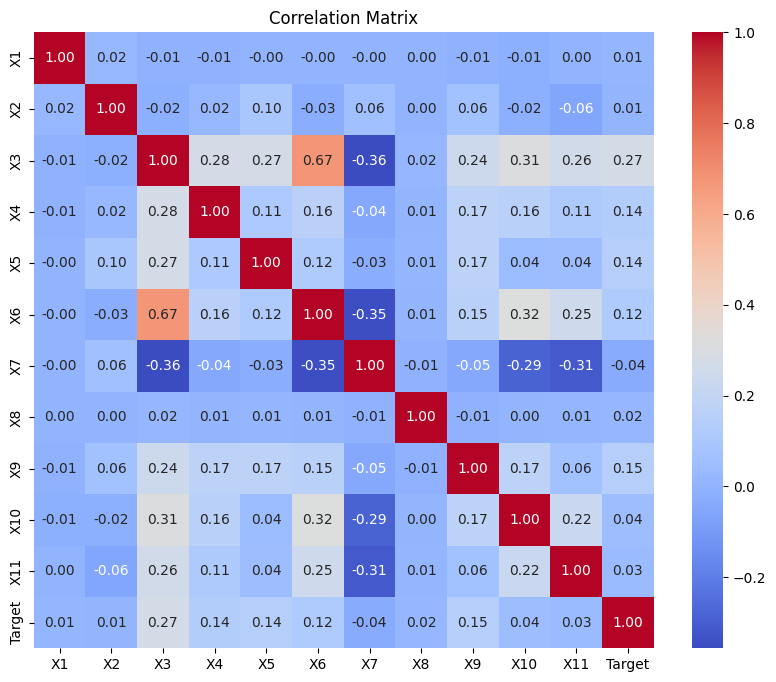

In [18]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
df_final=df.drop(columns=["X7"])

In [20]:
df_final.head()

,X1,X2,X3,X4,X5,X6,X8,X9,X10,X11,Target
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,0,202.21,28.963494,2,1
2,31112,1,80.0,0,1,1,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,0,174.12,24.000000,2,1


In [21]:
x = df_final.drop(columns=["Target"])
y = df_final["Target"]


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [23]:
# Create a Support Vector Classification model
svc = SVC()

# Train the model on the training data
svc.fit(x_train, y_train)

# Make predictions on the testing data
predictions = svc.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9225


In [24]:
predictions = svc.predict(x_train)

# Evaluate the model
accuracy = accuracy_score(y_train, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9415442325726789


In [25]:
predictions.shape

(3199,)

In [26]:
# Assuming y_test and predictions are pandas Series
precision_svc = precision_score(y_train, predictions)
recall_svc = recall_score(y_train, predictions, average='weighted')
f1_svc = f1_score(y_train, predictions, average='weighted')
conf_matrix_svc = confusion_matrix(y_train, predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("F1 Score:", f1_svc)
print("Confusion Matrix:\n", conf_matrix_svc)

Precision: 0.0
Recall: 0.9415442325726789
F1 Score: 0.9131963382736787
Confusion Matrix:
 [[3012    0]
 [ 187    0]]


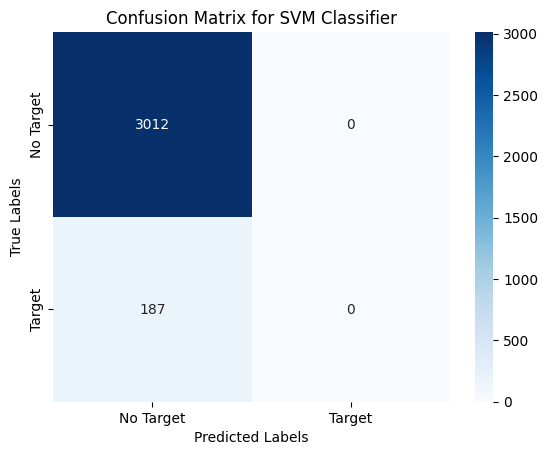

In [28]:
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['No Target', 'Target'], yticklabels=['No Target', 'Target'])
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()